# TP2 : Filtre de Wiener - Louis Hémadou

Le but de ce TP est de déflouter une image grâce au filtre de Wiener.
Voici l'image en question:

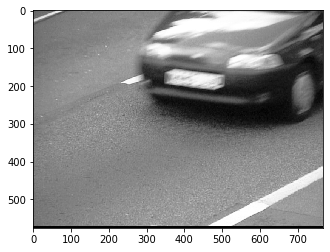

In [143]:
plt.imshow(plt.imread("car_original.tif"), cmap="Greys_r")
plt.show()

Le temps d'exposition de l'appareil photo est trop long, cela donne une image floue de mauvaise qualité. On tourne l'image de manière à aligner la direction de la voiture avec l'axe horizontal.

On importe les bibliothèques nécéssaires puis on charge l'image tournée.

In [2]:
import numpy as np 

import matplotlib.pyplot as plt 

%matplotlib inline 

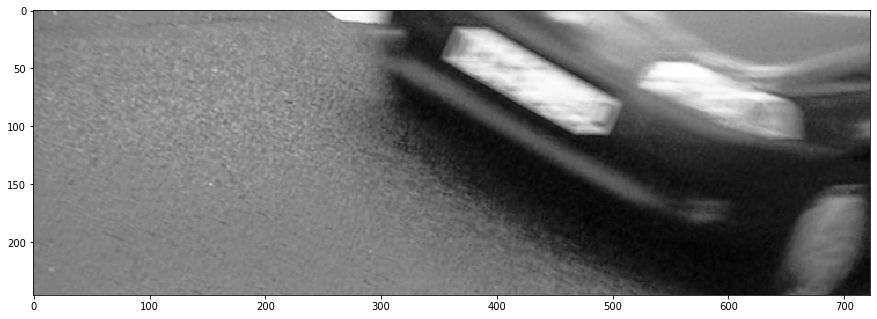

In [11]:
def rgb2grey(I):
    return 0.2989*I[:,:,0] + 0.5870*I[:,:,1] + 0.1140*I[:,:,2]

name='car.png'
g=rgb2grey(plt.imread(name))
plt.figure(figsize=(15,15))
plt.imshow(g, cmap="Greys_r")
plt.show()

Chaque pixel de cette image $g$ est la moyenne arithmétique de ses pixels voisins sur une distance de L pixels:
$g(x, y) = \frac{1}{L} \displaystyle\sum_{l=1}^{L}f(x+l, y) + n(x,y)$ où $f$ est l'image originale et $n$ est un bruit.
En mesurant L sur l'image tournée, on trouve L = 31 pixels.

En négligeant le bruit, le but est maintenant de trouver $h$, noyau de convolution, tel que $g = f * h$, c'est à dire
\begin{equation}
\frac{1}{L} \displaystyle\sum_{l=1}^{L}f(x+l, y) = \displaystyle \sum_i \sum_j f(x,y) h(x-i, y-j)
\end{equation}

Plusieurs solutions sont possibles. On peut par exemple prendre pour $h$ une matrice de taille L fois L avec le terme $\frac{1}{L}$ à la première ligne, et 0 aux autres.

In [6]:
L = 31
dim = g.shape
h = np.zeros((L, L))
h[0,:] = (1/L)*np.ones(L)

On étend la matrice de taille L fois L à une matrice de même taille que l'image.

In [7]:
h_resized = np.zeros(dim)
h_resized[:L, :L] = h

On va maintenant appliquer la technique de déconvolution de Wiener. On a $F \simeq WG$, avec $F$ transformée de Fourier de $f$, $G$ transformée de Fourier de $g$ et $W(u,v) = \frac{\overline{H}(u,v)}{|H(u,v)|^2 + K(u,v)}$, avec $H$ transformée de Fourier de h et $K$ rapport bruit/signal. En pratique, on prend $K(u,v) = K$, une constante.

K = 0.005


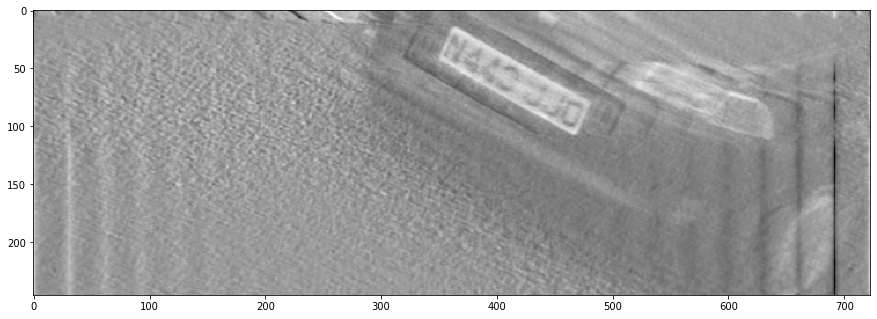

K = 0.01


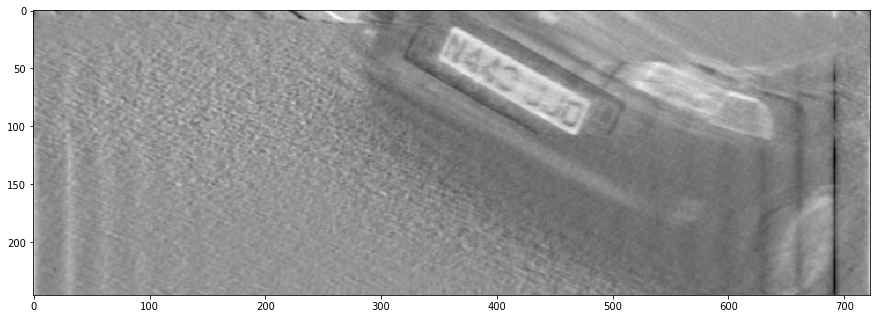

K = 0.015


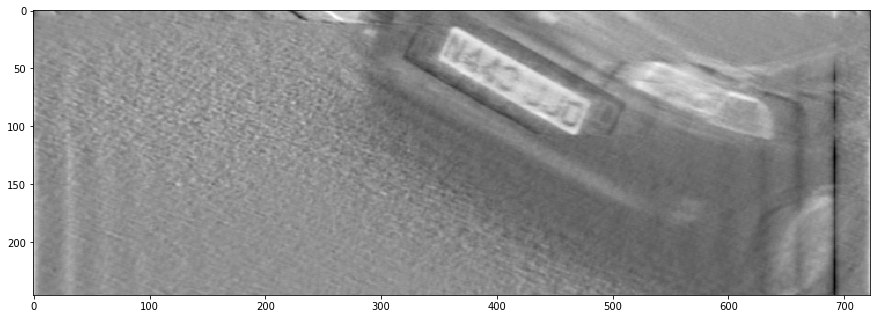

K = 0.02


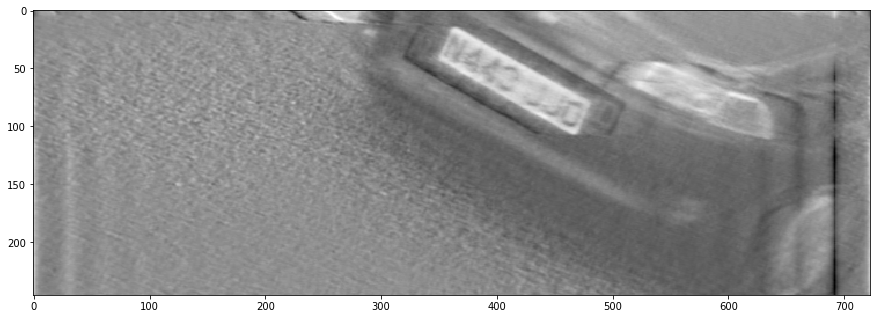

K = 0.025


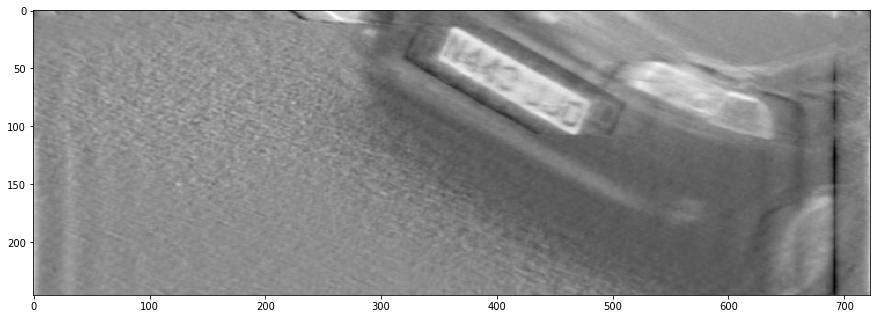

K = 0.03


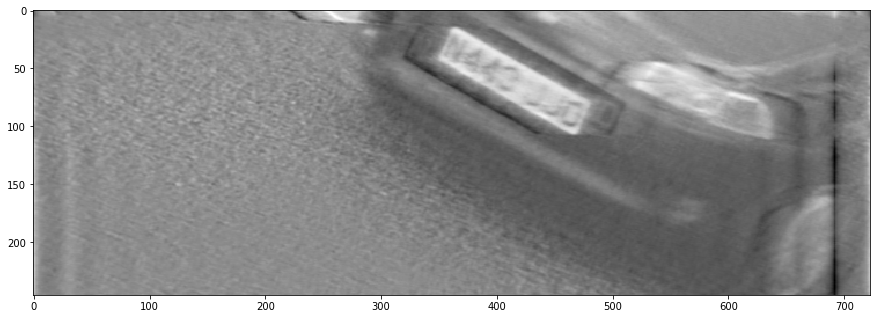

K = 0.035


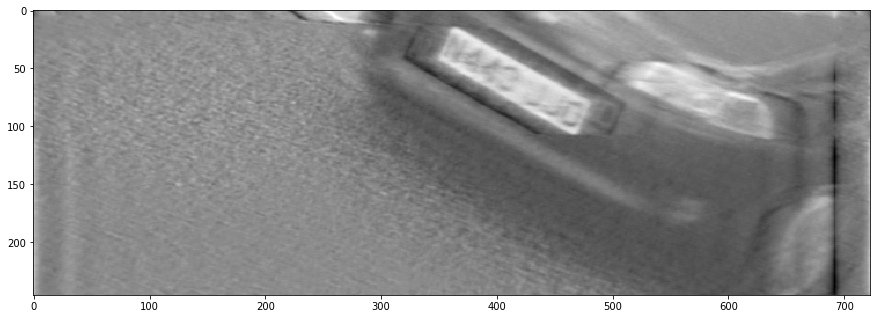

K = 0.04


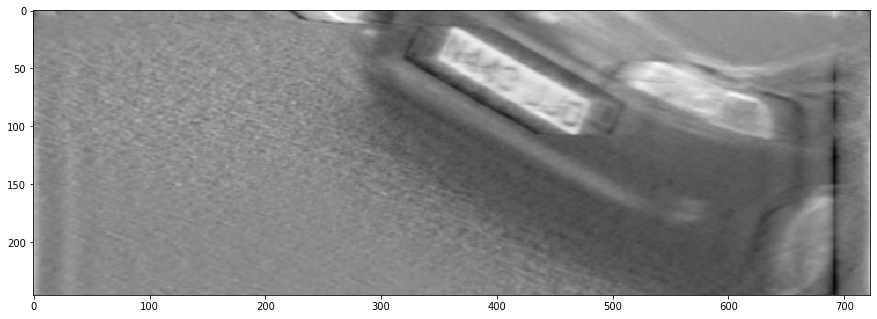

In [8]:
H = np.fft.fft2(h_resized)
G = np.fft.fft2(g)
K_list = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
for K in K_list:
    W = H.conjugate()/((H*H.conjugate()).real + K)
    F = W*G
    f = np.fft.ifft2(F).real
    print("K = " + str(K))
    plt.figure(figsize=(15,15))
    plt.imshow(f, cmap="Greys_r")
    plt.show()


La valeur optimal de K se vitue entre 0.01 et 0.03. L'image est suffisamment défloutée pour pouvoir lire la plaque d'immatriculation: N443 JJ0.